# 4.10 Coding Etiquette & Excel Reporting

## script's table of contents: #

### importing data (step 1)
### security implications (step 2)
### exclusion flag for low-activity customers (step 4)
### customer profiling (step 5 and 6)
### max, mean, and min variables on a customer-profile (step 7)
### comparing your customer profiles with regions and departments (step 8)



# importing data (step 1)

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing tables
path = r'C:\Users\Lenovo\Instacart Basket Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cust_ord_prod.pkl'),)

In [4]:
# checking data
df.head()

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,mean_days,frequency_flag,last_name,Gender,state,Age,date_joined,Dependants,family_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
df.shape

(32406041, 29)

# security implications (step 2)

Custoner names are PII. First name were renoved previously. Last name shall also be dropped.

In [6]:
# dropping 'last name' column
df= df.drop(columns = ['last_name'])  

In [7]:
# checking results
df.columns


Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'mean_days', 'frequency_flag', 'Gender',
       'state', 'Age', 'date_joined', 'Dependants', 'family_status', 'income'],
      dtype='object')

# regional segmentation (step 3)

creating region column (step 3.1)

In [8]:
# checking list of states
df['state'].value_counts(dropna = False)

Pennsylvania            667094
California              659828
Rhode Island            656935
Georgia                 656414
New Mexico              654499
Arizona                 654005
North Carolina          651928
Oklahoma                651760
Alaska                  648519
Minnesota               647851
Massachusetts           646378
Wyoming                 644283
Virginia                641432
Missouri                640761
Texas                   640432
Colorado                639293
Maine                   638593
North Dakota            638507
Alabama                 638041
Kansas                  637570
Louisiana               637506
Delaware                637049
South Carolina          636768
Oregon                  636442
Nevada                  636163
Arkansas                636158
New York                636003
Montana                 635280
South Dakota            633786
Illinois                633059
Hawaii                  632922
Washington              632877
Mississi

In [9]:
# creating region list

region = []

In [10]:
for value in df['state']:
    if value in ['Maine','New Hampshire', 'Vermont', 'Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append('Midwest')
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [11]:
# checking region list
region

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [12]:
# adding region column 

df['region'] = region

In [13]:
# checking results
df['region'].value_counts(dropna = False)

South        10792300
West          8293217
Midwest       7597585
Northeast     5722939
Name: region, dtype: int64

determining difference in spending habits between the different U.S. regions (step 3.2)

In [14]:
# crosstab between region and spending_flag
regional_spending_crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [15]:
# checking results

regional_spending_crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155979,7441606
Northeast,108226,5614713
South,209693,10582607
West,160354,8132863


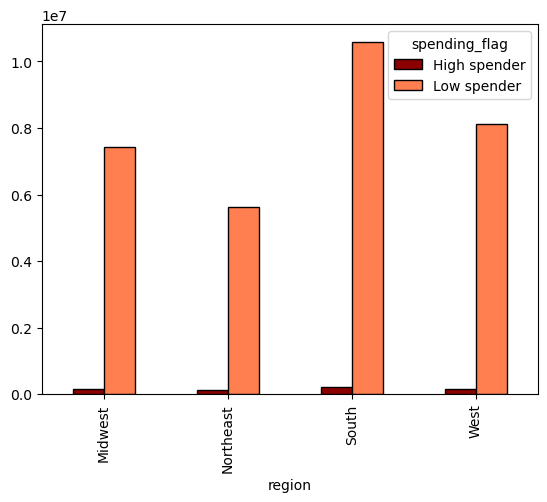

In [160]:
# creating bar chart 

regional_spending_bar = regional_spending_crosstab.plot.bar(color = ['darkred','coral'], ec = 'black')

In [157]:
spending_region_crosstab = pd.crosstab(df['spending_flag'], df['region'], dropna = False)

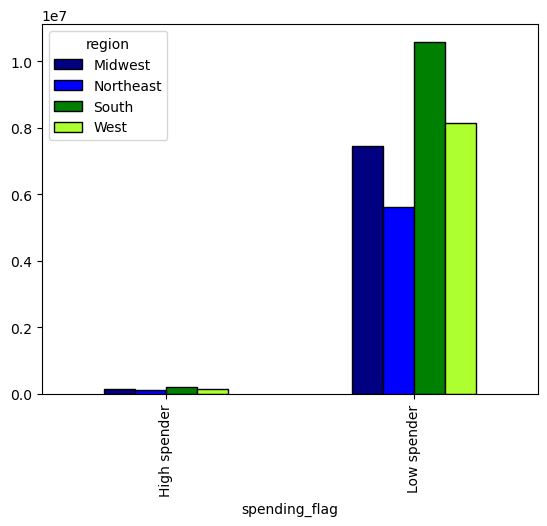

In [158]:
spending_regiong_bar = spending_region_crosstab.plot.bar(color = ['navy','blue','green','greenyellow'], ec= ['black'])

In [164]:
spending_loyal_crosstab = pd.crosstab(df['spending_flag'], df['loyalty_flag'], dropna = False)

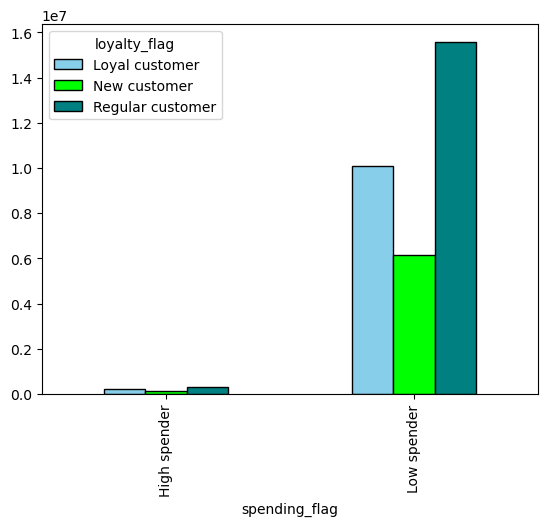

In [174]:
spending_loyal_bar = spending_loyal_crosstab.plot.bar(color = ['skyblue','lime', 'teal'], ec = 'black')

In [176]:
loyal_spending_crosstab = pd.crosstab(df['loyalty_flag'], df['spending_flag'], dropna = False)

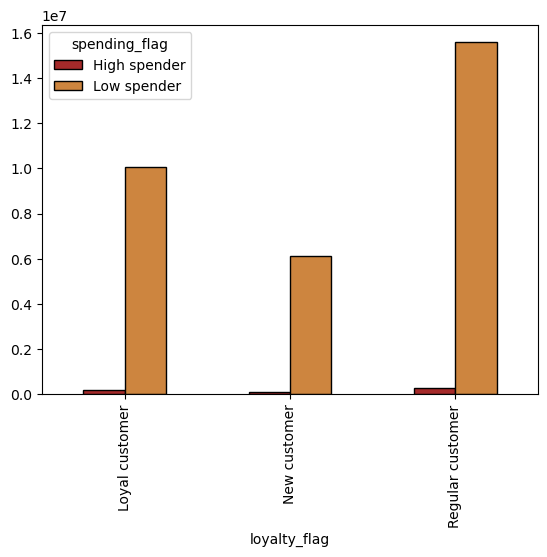

In [178]:
loyal_spending_bar = loyal_spending_crosstab.plot.bar(color = ['brown','peru'], ec = 'black')

In [161]:
# exporting bar charts

regional_spending_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regional_spending_bar.png'))

In [169]:
spending_regiong_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_regiong_bar.png'))

In [175]:
spending_loyal_bar .figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_loyal_bar .png'))

In [179]:
loyal_spending_bar .figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_spending .png'))

# exclusion flag for low-activity customers (step 4)

In [18]:
# creating activity flags

df.loc[df['max_order'] < 5, 'activity_flag'] = 'low-activity customer'

In [19]:
df.loc[df['max_order'] >= 5, 'activity_flag'] = 'high-activity customer'

In [20]:
df['activity_flag'].value_counts(dropna = False)

high-activity customer    30965686
low-activity customer      1440355
Name: activity_flag, dtype: int64

In [21]:
# creating high-activity customers sample

df_high_activity = df[df['activity_flag'] == 'high-activity customer']

In [22]:
# checking results
df.shape

(32406041, 30)

In [23]:
df_high_activity.shape

(30965686, 30)

In [24]:
df_high_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','high_activity_customers.pkl'))

# customer profiling (step 5 and 6)

customer profiling by age

In [25]:
# creating age profiles

df.loc[df['Age'] < 30, 'age_profile'] = 'below-30'

In [26]:
df.loc[((df['Age'] >= 30) & (df['Age'] <= 60)), 'age_profile'] = '30-to-60'

In [27]:
df.loc[df['Age'] > 60, 'age_profile'] = 'over-60'

In [28]:
# checking results
df['age_profile'].value_counts(dropna = False)

30-to-60    15732153
over-60     10583191
below-30     6090697
Name: age_profile, dtype: int64

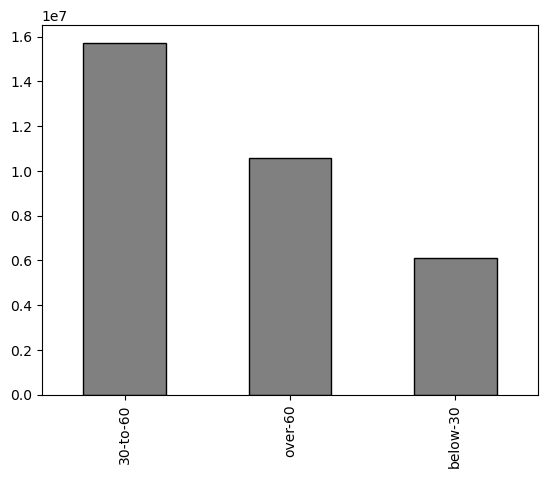

In [29]:
# creating bar chart
age_bar = df['age_profile'].value_counts().plot.bar(color=['grey'], ec = 'black')


In [30]:
# exporting bar chart
age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_bar.png'))

customer profiling by income

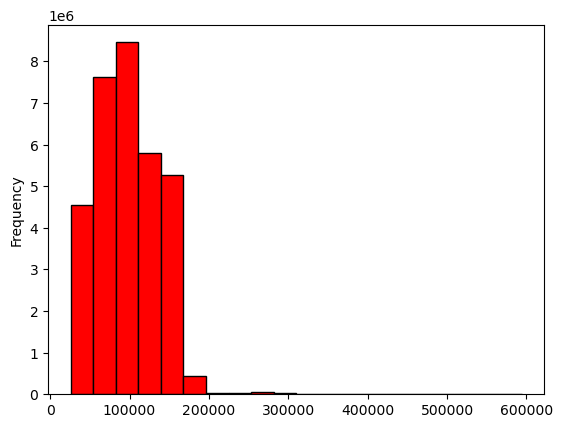

In [31]:
# creating histogram for income distibution
income_histogram = df['income'].plot.hist(bins = 20, color = ['red'], ec = 'black')


In [32]:
# exporting historam
income_histogram.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_histogram.png'))

In [33]:
df.loc[df['income'] < 750000, 'income_profile'] = 'below-75k'

In [34]:
df.loc[(df['income'] >= 75000) & (df['income'] <= 125000), 'income_profile'] = '75k-to-125k'

In [35]:
df.loc[df['income'] > 125000, 'income_profile'] = 'over-125k'

In [36]:
df['income_profile'].value_counts(dropna = False)

75k-to-125k    13331618
below-75k      10443165
over-125k       8631258
Name: income_profile, dtype: int64

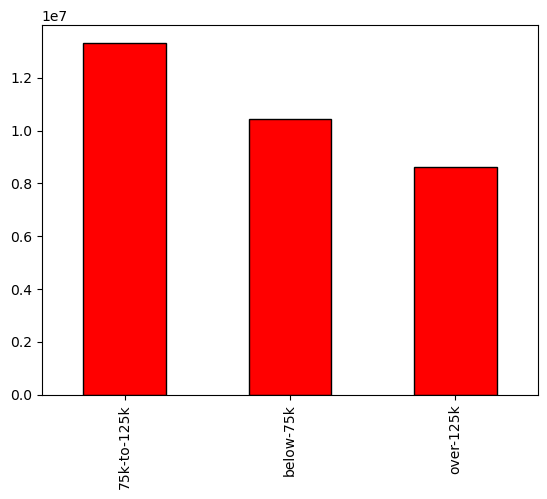

In [37]:
# creating bar chart 

income_bar = df['income_profile'].value_counts().plot.bar(color = ['red'], ec = 'black')

In [38]:
# exporting bar chart
income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_bar.png'))

customer profiling by type of products



In [39]:
# checking departments
df['department_id'].value_counts(dropna = False)

4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     704111
11     447629
18     423802
6      269253
5      153743
8       97716
21      69145
2       36291
10      34573
Name: department_id, dtype: int64

In [40]:
# importing department codes 
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.x.csv'), index_col = False)

In [41]:
df_dep

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [42]:
df_dep.to_clipboard() # departments cannot be seen very well - by pasting to excel, confirmed numbers and names

Family status 

In [43]:
df['family_status'].value_counts(dropna = False)

married                             22757541
single                               5325934
divorced/widowed                     2771925
living with parents and siblings     1550641
Name: family_status, dtype: int64

In [44]:
df['family_status'].value_counts(dropna = False)

married                             22757541
single                               5325934
divorced/widowed                     2771925
living with parents and siblings     1550641
Name: family_status, dtype: int64

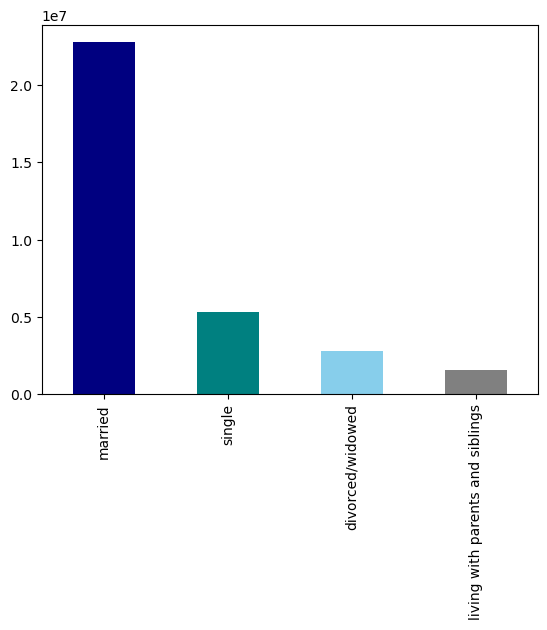

In [233]:
family_status_bar = df['family_status' ].value_counts().plot.bar(color=['navy','teal','skyblue', 'grey'])

In [234]:
family_status_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_status_bar.png'))

In [45]:
family_status_crosstab = pd.crosstab(df['family_status'], df['Dependants'], dropna = False)

In [46]:
family_status_crosstab

Dependants,0,1,2,3
family_status,,,,
divorced/widowed,2771925,0,0,0
living with parents and siblings,0,530216,507977,512448
married,0,7551193,7583419,7622929
single,5325934,0,0,0


In [47]:
df.loc[(df['Dependants'] == 0), 'children'] = 'no childern'

In [48]:
df.loc[(df['Dependants'] >= 1), 'children'] = 'with childern'

In [49]:
df['children'].value_counts(dropna = False)

with childern    24308182
no childern       8097859
Name: children, dtype: int64

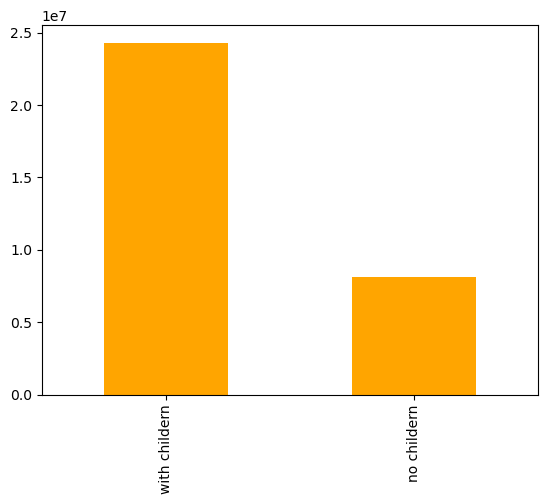

In [235]:
children_status_bar = df['children'].value_counts().plot.bar(color=['orange'])


In [51]:
children_status_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'children_status_bar.png'))

In [52]:
# creating crosstab for users and departments
user_dep_crosstab = pd.crosstab(df['department_id'], df['user_id'], dropna = False)

In [53]:
# creating and assingning flags for baby-parents
baby_dict = dict()
for user in user_dep_crosstab:
    workinglist = user_dep_crosstab[user].tolist()
    if workinglist[18] == 0 :     
        baby_dict[user] = 'non-baby-parent'
    else:
        baby_dict[user] = 'baby-parent'

In [54]:
baby_flag = []

for user in df['user_id']:
    baby_flag.append(baby_dict[user])

In [55]:
df['baby_parents'] = baby_flag

In [56]:
df['baby_parents'].value_counts(dropna = False)

baby-parent        30989507
non-baby-parent     1416534
Name: baby_parents, dtype: int64

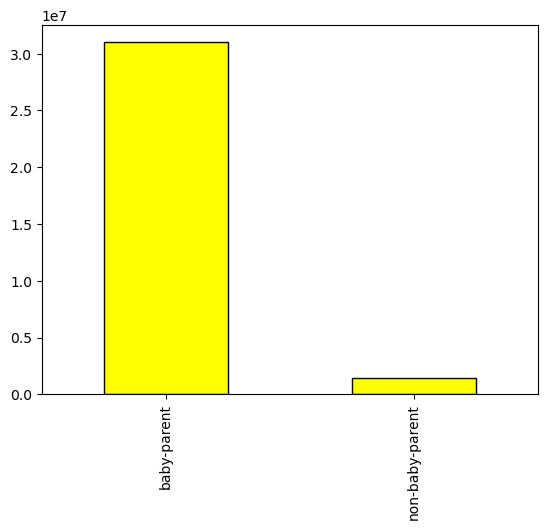

In [57]:
bar_baby_parents = df['baby_parents'].value_counts().plot.bar(color = ['yellow'], ec = 'black')


In [58]:
bar_baby_parents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_baby_parents.png'))

In [59]:
# creating and assingning flags for abstinant customers

In [60]:
abstinent_dict = dict()
for user in user_dep_crosstab:
    workinglist = user_dep_crosstab[user].tolist()
    if workinglist[5] == 0 :     
        abstinent_dict[user] = 'abstinent'
    else:
        abstinent_dict[user] = 'non-abstinent'

In [61]:
alcohol_flag = []

for user in df['user_id']:
    alcohol_flag.append(abstinent_dict[user])

In [62]:
df['abstinence'] = alcohol_flag

In [63]:
df['abstinence'].value_counts(dropna = False)

non-abstinent    19540578
abstinent        12865463
Name: abstinence, dtype: int64

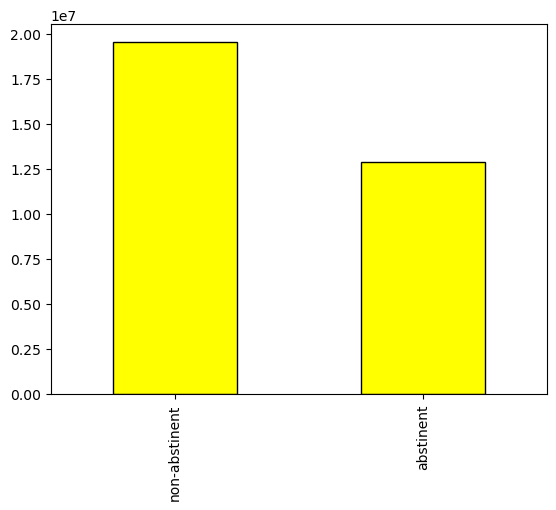

In [64]:
bar_abstinent = df['abstinence'].value_counts().plot.bar(color = ['yellow'], ec = 'black')

In [65]:
bar_abstinent.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'abstinent_bar.png'))

In [66]:
# creating and assingning flags for pet owners

In [67]:
pet_dict = dict()
for user in user_dep_crosstab:
    workinglist = user_dep_crosstab[user].tolist()
    if workinglist[8] == 0 :     
        pet_dict[user] = 'non-pet-owner'
    else:
        pet_dict[user] = 'pet-owner'

In [68]:
pet_flag = []
for user in df['user_id']:
    pet_flag.append(pet_dict[user])

In [69]:
df['pet_owners'] = pet_flag

In [70]:
df['pet_owners'].value_counts(dropna = False)

pet-owner        26182942
non-pet-owner     6223099
Name: pet_owners, dtype: int64

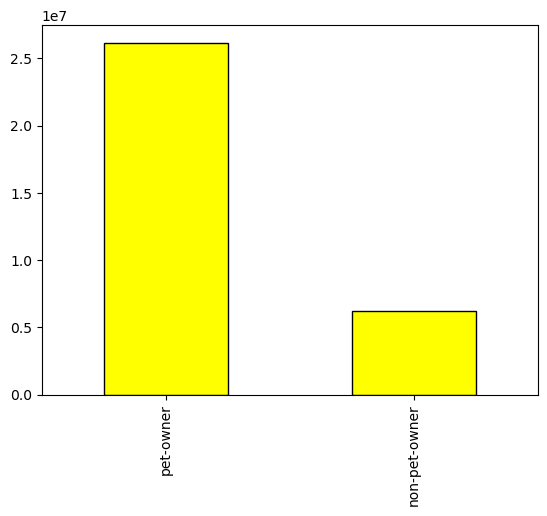

In [71]:
bar_pet_owners = df['pet_owners'].value_counts().plot.bar(color = ['yellow'], ec = 'black')

In [72]:
bar_pet_owners.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_owners_bar.png'))

In [73]:
# creating and assingning flags for vegans and vegetarians

In [74]:
vege_dict = dict()
for user in user_dep_crosstab:
    workinglist = user_dep_crosstab[user].tolist()
    if workinglist[12] == 0 and workinglist[16] == 0:  
        vege_dict[user] = 'vegan'
    elif workinglist[11] == 0:
        vege_dict[user] = 'vegetarian'
    else:
        vege_dict[user] = 'meat-eater'

In [75]:
vege_flag = []
for user in df['user_id']:
    vege_flag.append(vege_dict[user])

In [76]:
df['vege'] = vege_flag

In [77]:
df['vege'].value_counts(dropna = False)

meat-eater    23507940
vegetarian     8089011
vegan           809090
Name: vege, dtype: int64

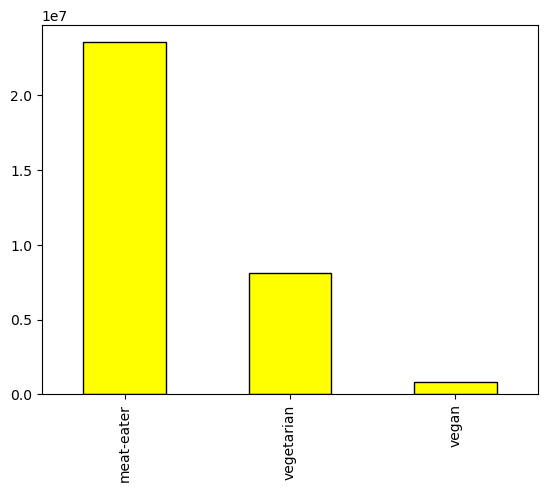

In [78]:
bar_vege = df['vege'].value_counts().plot.bar(color = ['yellow'], ec = 'black')

In [79]:
bar_vege.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vege_bar.png'))

# max, mean, and min variables on a customer-profile (step 7)

In [80]:
# statistics for age
df.groupby('age_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices              
                              mean   max  min       mean      max  min
age_profile                                                           
30-to-60                 11.114539  30.0  0.0  11.996146  99999.0  1.0
below-30                 11.113214  30.0  0.0  12.171756  99999.0  1.0
over-60                  11.083335  30.0  0.0  11.845765  99999.0  1.0

In [81]:
# statistics for income

df.groupby('income_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices              
                                 mean   max  min       mean      max  min
income_profile                                                           
75k-to-125k                 11.049464  30.0  0.0   9.468776  99999.0  1.0
below-75k                   11.240516  30.0  0.0   7.443262  14900.0  1.0
over-125k                   11.024127  30.0  0.0  21.348031  99999.0  1.0

In [82]:
# statistics for family status

df.groupby('family_status').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices  \
                                                   mean   max  min       mean   
family_status                                                                   
divorced/widowed                              11.047753  30.0  0.0  11.453515   
living with parents and siblings              11.048160  30.0  0.0  10.828673   
married                                       11.116199  30.0  0.0  12.005479   
single                                        11.098031  30.0  0.0  12.480594   

                                                
                                      max  min  
family_status                                   
divorced/widowed                  99999.0  1.0  
living with parents and siblings  99999.0  1.0  
married                           99999.0  1.0  
single                            99999.0  1.0

In [83]:
# statistics for children

df.groupby('children').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices              
                                mean   max  min       mean      max  min
children                                                                
no childern                11.080822  30.0  0.0  12.129022  99999.0  1.0
with childern              11.111857  30.0  0.0  11.930410  99999.0  1.0

In [84]:
# statistics for baby parents

df.groupby('baby_parents').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices              
                                  mean   max  min       mean      max  min
baby_parents                                                              
baby-parent                   10.95044  30.0  0.0  11.965077  99999.0  1.0
non-baby-parent               14.77341  30.0  0.0  12.307395  99999.0  1.0

In [85]:
# statistics for abstinence

df.groupby('abstinence').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices              
                                mean   max  min       mean      max  min
abstinence                                                              
abstinent                  12.631409  30.0  0.0  12.617826  99999.0  1.0
non-abstinent              10.137818  30.0  0.0  11.560124  99999.0  1.0

In [86]:
# statistics for pet owners

df.groupby('pet_owners').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices              
                                mean   max  min       mean      max  min
pet_owners                                                              
non-pet-owner              12.328063  30.0  0.0  12.770027  99999.0  1.0
pet-owner                  10.823496  30.0  0.0  11.792278  99999.0  1.0

In [87]:
# statistics for vege preferences 
df.groupby('vege').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices              
                             mean   max  min       mean      max  min
vege                                                                 
meat-eater              10.705621  30.0  0.0  12.044825  99999.0  1.0
vegan                   15.299204  30.0  0.0  11.007857  99999.0  1.0
vegetarian              11.906303  30.0  0.0  11.889006  99999.0  1.0

In [88]:
# Creating crosstab between age profile and order day of week 

age_odow_crosstab = pd.crosstab(df['age_profile'], df['order_day_of_week'], dropna = False)

In [89]:
age_odow_crosstab

order_day_of_week,0,1,2,3,4,5,6
age_profile,,,,,,,
30-to-60,3014628,2754270,2050220,1862206,1840016,2038028,2172785
below-30,1167161,1068537,788849,716003,710709,792232,847206
over-60,2022615,1837649,1374917,1262492,1233228,1375646,1476644


# comparing your customer profiles with regions and departments (step 8)

crossing age with department and region

In [191]:
age_department_cross = pd.crosstab(df['department_id'], df['age_profile'], normalize = 'index')   

In [192]:
age_department_cross

age_profile,30-to-60,below-30,over-60
department_id,,,
1,0.483710,0.187723,0.328567
2,0.480174,0.197377,0.322449
3,0.485625,0.187949,0.326426
4,0.486088,0.187240,0.326672
5,0.490442,0.193667,0.315891
6,0.486483,0.190627,0.322890
7,0.485685,0.185833,0.328482
8,0.475572,0.195618,0.328810
9,0.484724,0.189732,0.325544


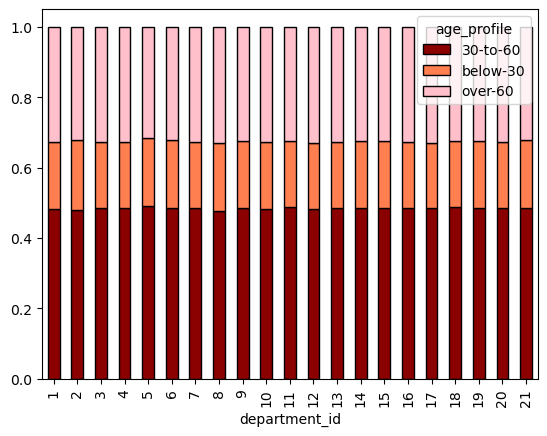

In [194]:
age_department_bar = age_department_cross.plot.bar(color = ['darkred','coral','pink'], ec= ['black'], stacked = True)

In [92]:
age_region_cross = pd.crosstab(df['age_profile'], df['region'], normalize = 'columns')

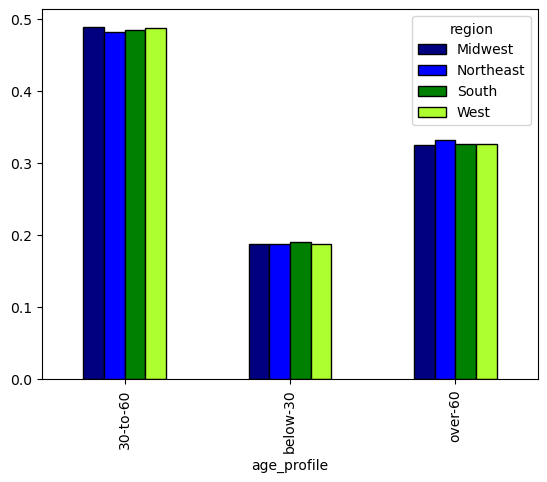

In [127]:
age_region_bar = age_region_cross.plot.bar(color = ['navy','blue','green','greenyellow'], ec= ['black'])

In [195]:
age_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_department_bar.png'))

In [129]:
region_age_cross = pd.crosstab(df['region'], df['age_profile'], normalize = 'columns')

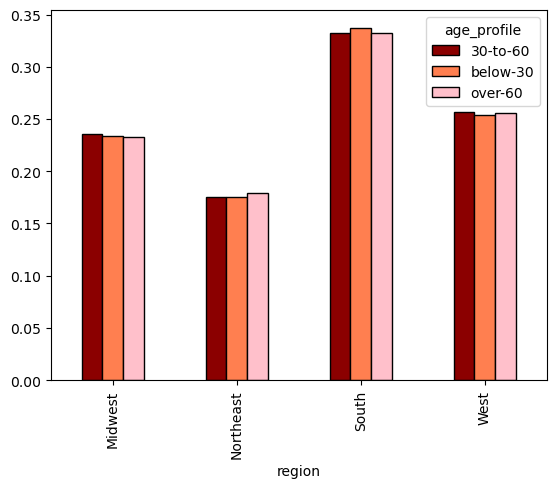

In [130]:
region_age_bar = region_age_cross.plot.bar(color = ['darkred','coral','pink'], ec= ['black'])

In [210]:
spending_age_cross = pd.crosstab(df['age_profile'], df['spending_flag'], normalize = 'columns')

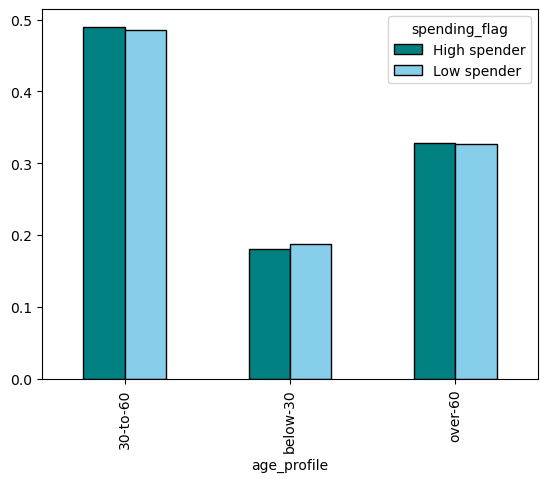

In [212]:
spending_age_bar = spending_age_cross.plot.bar(color = ['teal','skyblue'], ec= ['black'])

In [128]:
# exporting bar chart

age_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_region_bar.png'))

In [217]:
age_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_department_bar.png'))

In [215]:
spending_age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_age_bar.png'))

crossing income with region and department

In [136]:
income_department_cross = pd.crosstab(df['income_profile'], df['department_id'], normalize = 'index')

In [98]:
income_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
income_profile,,,,,,,,,,,,,,,,,,,,,
75k-to-125k,0.069533,0.001122,0.036724,0.300358,0.004533,0.008610,0.078198,0.003031,0.027913,0.001042,...,0.023718,0.058999,0.020708,0.034154,0.169386,0.022111,0.014032,0.077373,0.032655,0.002116
below-75k,0.067227,0.001114,0.034504,0.279560,0.004614,0.007759,0.091738,0.002845,0.024467,0.001184,...,0.017991,0.055205,0.023572,0.030145,0.160877,0.023558,0.011447,0.113851,0.032204,0.002150
over-125k,0.070176,0.001124,0.037365,0.296080,0.005228,0.008508,0.079662,0.003198,0.027689,0.000964,...,0.023732,0.059355,0.021072,0.034517,0.169209,0.022925,0.013578,0.077287,0.032393,0.002141


In [99]:
income_region_cross = pd.crosstab(df['income_profile'], df['region'], normalize = 'columns')

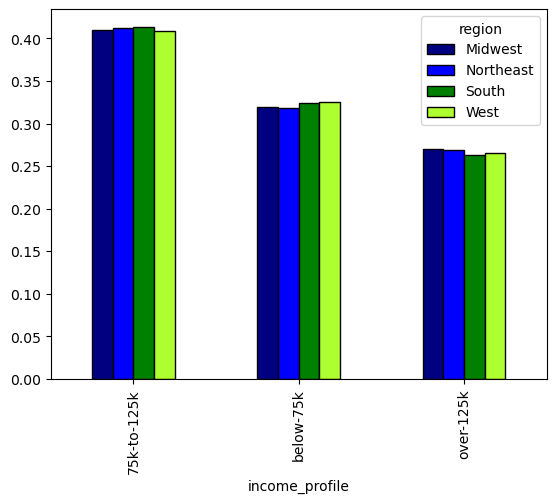

In [100]:
income_region_bar = income_region_cross.plot.bar(color = ['navy','blue','green','greenyellow'], ec= ['black'])

In [137]:
region_income_cross = pd.crosstab(df['region'], df['income_profile'], normalize = 'columns')

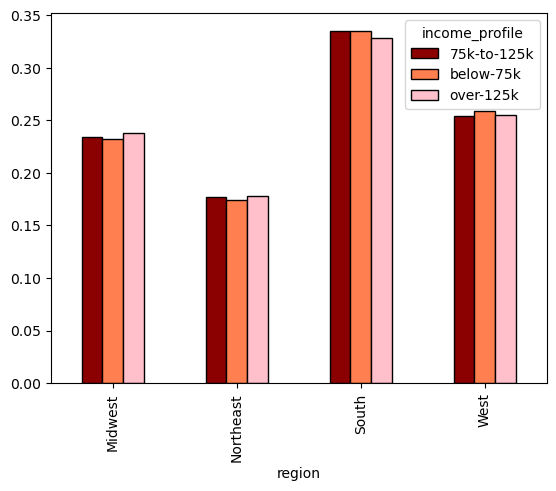

In [138]:
region_income_bar = region_income_cross.plot.bar(color = ['darkred','coral','pink'], ec= ['black'])

In [139]:
# exporting bar chart

income_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_region_bar.png'))

In [140]:
region_income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_income_bar.png'))

crossing vege preferences with region and department

In [102]:
vege_department_cross = pd.crosstab(df['vege'], df['department_id'], normalize = 'index') 

In [103]:
vege_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
vege,,,,,,,,,,,,,,,,,,,,,
meat-eater,0.069941,0.001030,0.037577,0.300348,0.003487,0.008678,0.071661,0.003045,0.029305,0.000955,...,0.029548,0.060086,0.020096,0.035650,0.166063,0.020931,0.014531,0.079553,0.032819,0.002064
vegan,0.068394,0.000959,0.029385,0.347843,0.013200,0.004556,0.122414,0.001285,0.016074,0.001437,...,0.017695,0.000000,0.021142,0.019282,0.170581,0.000000,0.008099,0.114435,0.032480,0.002446
vegetarian,0.066167,0.001397,0.032796,0.264221,0.007551,0.007611,0.111814,0.003102,0.020364,0.001355,...,0.000000,0.057222,0.026529,0.026504,0.167751,0.030489,0.009352,0.114332,0.031334,0.002304


In [104]:
vege_region_cross = pd.crosstab(df['vege'], df['region'], normalize = 'columns')

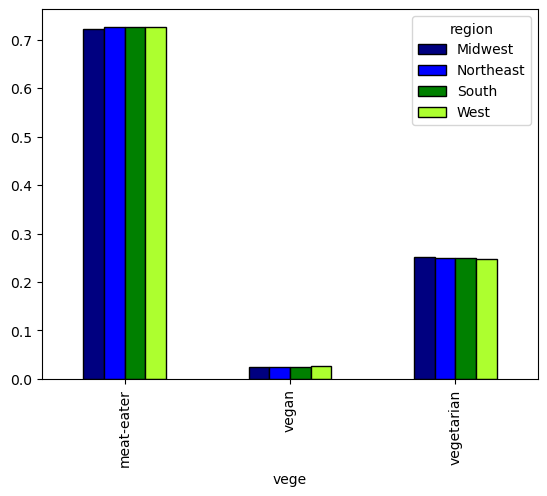

In [141]:
vege_region_bar = vege_region_cross.plot.bar(color = ['navy','blue','green','greenyellow'], ec= ['black'])

In [162]:
# exporting bar chart

vege_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vege_region_bar.png'))

crossing family status with region and department

In [107]:
family_stat_department_cross = pd.crosstab(df['family_status'], df['department_id'], normalize = 'index')   

In [108]:
family_stat_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
family_status,,,,,,,,,,,,,,,,,,,,,
divorced/widowed,0.069834,0.001083,0.036221,0.293238,0.004558,0.008319,0.083345,0.003034,0.026776,0.000998,...,0.021818,0.057715,0.021498,0.032201,0.166639,0.022297,0.012744,0.089034,0.032764,0.001982
living with parents and siblings,0.069992,0.001232,0.036206,0.289963,0.005738,0.008431,0.080373,0.003624,0.026893,0.001080,...,0.021914,0.058216,0.022422,0.033012,0.168180,0.022717,0.012992,0.088456,0.032512,0.002303
married,0.068946,0.001108,0.036115,0.292396,0.004645,0.008281,0.083008,0.002967,0.026789,0.001082,...,0.022009,0.057930,0.021727,0.033045,0.166477,0.022967,0.013058,0.089183,0.032327,0.002131
single,0.068267,0.001159,0.036426,0.293397,0.004977,0.008384,0.083256,0.003037,0.026482,0.001035,...,0.021331,0.057600,0.021648,0.032967,0.166628,0.022337,0.013363,0.088999,0.032732,0.002177


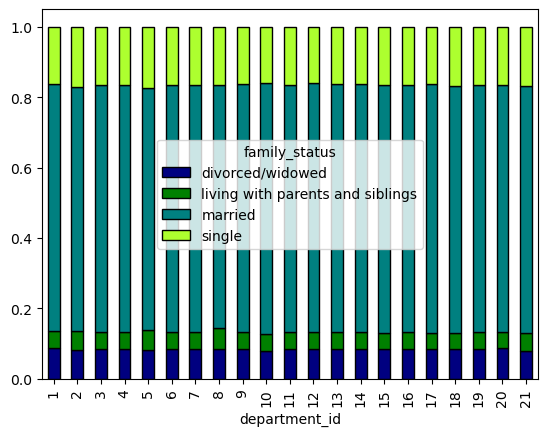

In [220]:
family_stat_department_cross_bar = family_stat_department_cross.plot.bar(color = ['navy','green','teal','greenyellow'], ec= ['black'], stacked = True)

In [109]:
family_stat_region_cross = pd.crosstab(df['family_status'], df['region'], normalize = 'columns')

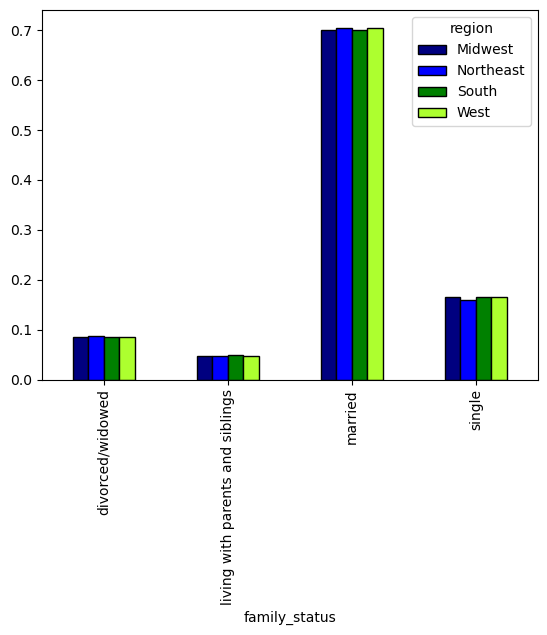

In [144]:
family_stat_region_bar = family_stat_region_cross.plot.bar(color = ['navy','blue','green','greenyellow'], ec= ['black'])

In [145]:
family_stat_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_stat_region_bar.png'))

In [224]:
family_stat_spending_cross = pd.crosstab(df['family_status'], df['spending_flag'], normalize = 'index')

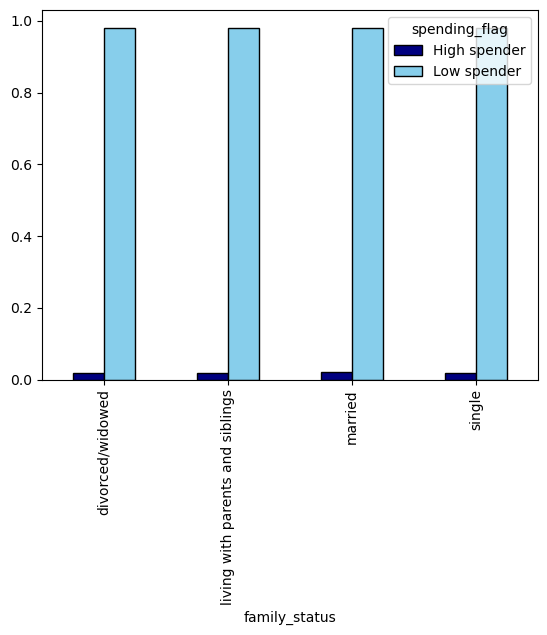

In [227]:
family_stat_spending_bar = family_stat_spending_cross.plot.bar(color = ['navy','skyblue',], ec= ['black'])
                                        

In [204]:
family_stat_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_stat_department_bar.png'))

crossing children status with region and department

In [112]:
children_department_cross = pd.crosstab(df['children'], df['department_id'], normalize = 'index')  

In [113]:
children_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
children,,,,,,,,,,,,,,,,,,,,,
no childern,0.068803,0.001133,0.036356,0.293342,0.004834,0.008362,0.083286,0.003036,0.026583,0.001022,...,0.021498,0.057640,0.021597,0.032705,0.166632,0.022324,0.013151,0.089011,0.032743,0.002110
with childern,0.069013,0.001116,0.036120,0.292241,0.004714,0.008291,0.082840,0.003009,0.026796,0.001082,...,0.022003,0.057948,0.021771,0.033043,0.166585,0.022951,0.013054,0.089137,0.032339,0.002142


In [114]:
children_stat_region_cross = pd.crosstab(df['children'], df['region'], normalize = 'columns')

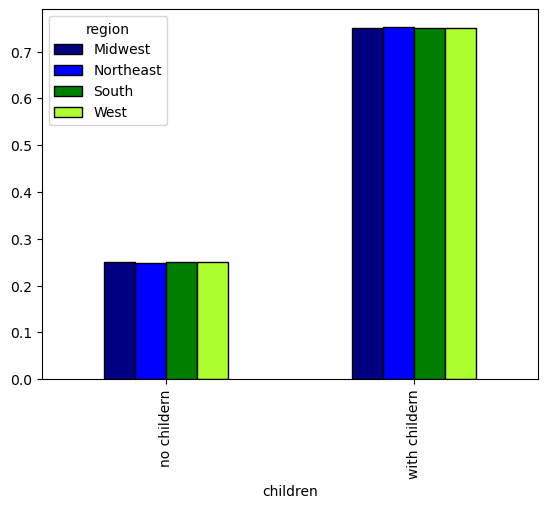

In [146]:
children_stat_region_bar = children_stat_region_cross.plot.bar(color = ['navy','blue','green','greenyellow'], ec= ['black'])

In [147]:
children_stat_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'children_stat_region_bar.png'))

crossing baby status with region and department

In [117]:
baby_parent_department_cross = pd.crosstab(df['baby_parents'], df['department_id'], normalize = 'index')  

In [118]:
baby_parent_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
baby_parents,,,,,,,,,,,,,,,,,,,,,
baby-parent,0.069224,0.001107,0.036431,0.288912,0.004394,0.008341,0.082368,0.003000,0.026873,0.001073,...,0.021714,0.057864,0.022004,0.032958,0.166281,0.022367,0.013313,0.093178,0.032765,0.002133
non-baby-parent,0.063191,0.001410,0.030674,0.371361,0.012412,0.007596,0.095719,0.003357,0.023900,0.000928,...,0.025440,0.058022,0.015693,0.032967,0.173500,0.032135,0.007924,0.000000,0.025334,0.002141


In [119]:
baby_parent_region_cross = pd.crosstab(df['baby_parents'], df['region'], normalize = 'columns')

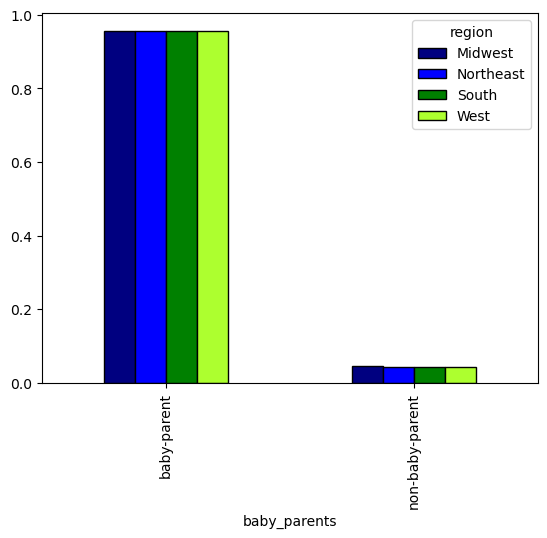

In [148]:
baby_parent_region_bar = baby_parent_region_cross.plot.bar(color = ['navy','blue','green','greenyellow'], ec= ['black'])

In [149]:
baby_parent_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'baby_parent_region_bar.png'))

In [186]:
spending_children_crosstab = pd.crosstab(df['children'], df['spending_flag'], dropna = False)

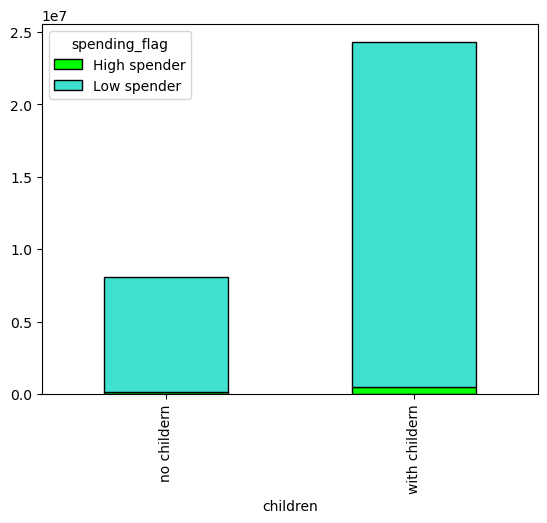

In [188]:
spending_children_bar = spending_children_crosstab.plot.bar(color = ['lime','turquoise','skyblue'], ec= ['black'],stacked = True)

In [189]:
spending_children_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_children_bar.png'))

In [206]:
income_department_cross = pd.crosstab(df['department_id'], df['income_profile'], normalize = 'index')

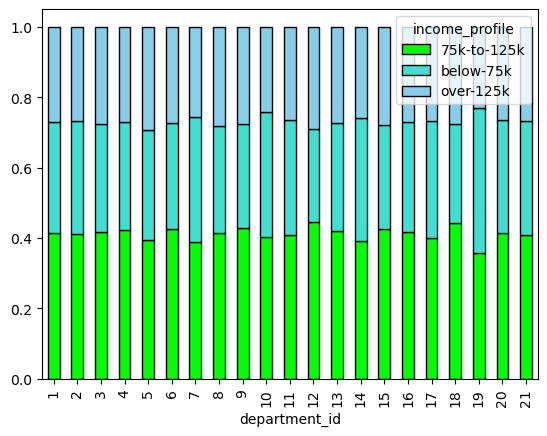

In [207]:
income_department_bar = income_department_cross.plot.bar(color = ['lime','turquoise','skyblue'], ec= ['black'],stacked = True)

In [156]:
income_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_department_bar.png'))

In [125]:
df.shape

(32406041, 37)

In [228]:
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data','cust_ord_prod_final.pkl'))